In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
sns.set_palette("pastel")

from sklearn.preprocessing import LabelEncoder

In [ ]:
df_resid = pd.read_csv('Residential.csv')

# Описание переменных

Для переменных типа bool 'True' обозначает наличи признака, а 'False' - его отсутствие

- `id` - идентификатор объекта; принимает положительные целые значения
- `name` - название объекта, str
- `energy_efficiency` - класс энергетической эффективности объекта, принимающий значение {'G', 'E', 'D', 'C', 'B', 'A', 'A+', 'A++'}; класс A++ обозначает максимальную энергоэффективность, а G - минимальную
- `due_date` - дата ввода объекта в эксплуатацию; в формате годQквартал
- `class` - класс недвижимости, принимающий значения {'Типовой', 'Комфорт', 'Бизнес', 'Элитный'}
- `wall_material` - материал стен, принимающий значения {'Кирпич', 'Монолит-кирпич', 'Другое', 'Монолит', 'Блоки', 'Панель'}
- `n_finish_types`- количество типов отделки, принимающее значения {0, 1, 2, 3}
- `layout_variation` - возможность свободной планировки, принимает значения {'True', 'False'}
- `n_floors` - количество этажей объекта, принимает положительные целые значения
- `n_flats` - количество квартир в объекте, принимает положительные целые значения
- `life_space` - жилая площадь объекта, м², принимает положительные значения
- `min_ceiling_height` - минимальная высота потолков объекта, принимает положительные значения
- `max_ceiling_height` - максимальная высота потолков объекта, принимает положительные значения
- `bike_paths` - наличие велосипедных дорожек, принимает значения {'True', 'False'}
- `n_playgrounds` - количество детских игровых площадок, принимает неотрицательные целые значения
- `n_sportsgrounds` - количество спортивных площадок, принимает неотрицательные целые значения
- `n_garbage_sites` - количество площадок для сбора мусора, принимает неотрицательные целые значения
- `n_parking_places` - количество парковочных мест, принимает положительные целые значения
- `ramp` - наличие пандусов, принимает значения {'True', 'False'}
- `lowering_platforms` - наличие понижающих площадок, принимает значения {'True', 'False'}
- `n_wheelchair_lifts` - количество инвалидных подъемников, принимает неотрицательные целые значения
- `n_entrances` - количество подъездов, принимает положительные целые значения
- `n_p_lifts` - количество пассажирских лифтов, принимает неотрицательные целые значения
- `n_f_lifts` - количество грузовых лифтов, принимает неотрицательные целые значения
- `n_lifts` - суммарное количество грузовых и пассажирских лифтов (`n_lifts = n_p_lifts + n_f_lifts`), принимает неотрицательные целые значения
- `infrastr_access` - доступность инфраструктуры, принимает целые значения от 1 до 10, где 1 - минимальное значение, а 10 - максимальное
- `transport_access` - транспортная доступность, принимает целые значения от 1 до 10, где 1 - минимальное значение, а 10 - максимальное
- `green_areas` - индекс наличия зеленых зон, принимает целые значения от 1 до 10, где 1 - минимальное значение, а 10 - максимальное
- `air_quality` - качество воздуха, принимает целые значения от 1 до 10, где 1 - минимальное значение, а 10 - максимальное
- `av_flat` - средняя площадь квартиры, м² (`av_flat = life_space / n_flats`), принимает положительные значения
- `n_p_s_grounds` - суммарное количество спортивных и детских игровых площадок (`n_p_s_grounds = n_playgrounds + n_sportsgrounds`), принимает неотрицательные целые значения
- `lift_ratio` - производный показатель - лифтовооруженность, демонстрирующий оснащенность лифтами (`lift_ratio = [n_flats - (n_flats/n_floors)(1 + 0,75 + 0,5 + 0,25 + 0,2)]/n_lifts`), принимает неотрицательные значения
- `low_mobility_facilities` - индекс доступности среды для маломобильных лиц (`low_mobility_facilities = 0,5 * (ramp + lowering_platforms)`); принимает значения {0, 0,5, 1}, где 0 - отсутствие пандусов и понижающих платформ, 0,5 - наличие одного из двух признаков, 1 - наличие и пандусов, и понижающих платформ
- `n_parking_per_flat` - количество парковочных мест, приходящихся на одну квартиру

In [ ]:
df_resid.head()

,id,name,energy_efficiency,due_date,class,wall_material,n_finish_types,layout_variation,n_floors,n_flats,...,n_entrances,n_p_lifts,n_f_lifts,n_lifts,lift_ratio,infrastr_access,transport_access,green_areas,air_quality,n_parking_per_flat
0,50878,"п. Металлплощадка, б-р Строителей, д. 71, корп...",B,2025Q4,Типовой,Кирпич,1,True,4,50,...,7.0,0,0,0,0.000000,5,NaN,NaN,NaN,0.000000
1,41995,"ЖК ""Челны Сити""",A+,2024Q3,Комфорт,Кирпич,0,False,27,312,...,2.0,2,4,6,46.800000,8,NaN,NaN,NaN,1.426282
2,54453,"ЖК ""Челны Сити""",C,2025Q2,Комфорт,Монолит-кирпич,0,False,21,238,...,1.0,3,0,3,69.133333,8,NaN,NaN,NaN,1.878151
3,45490,DOGMA,B,2026Q2,Комфорт,Монолит-кирпич,1,False,17,856,...,5.0,5,5,10,72.004706,5,NaN,NaN,NaN,0.964953
4,45491,DOGMA,B,2026Q2,Комфорт,Монолит-кирпич,1,False,17,666,...,4.0,4,4,8,70.027941,6,NaN,NaN,NaN,1.040541


In [ ]:
# Преобразование формата даты "годQквартал" в стандартный формат даты
df_resid['due_date'] = df_resid['due_date'].str.replace('Q', '-').str.replace('квартал', '')
df_resid['due_date'] = pd.to_datetime(df_resid['due_date'])

# Визуализации и первичные гипотезы

Мы рассмотрим не все признаки, которые собрали для выборки. Сконцентрируемся на тех, которые могут повлиять на нашу целевую переменную — класс недвижимости.

##О классах недвижимости

In [ ]:
#Мы будем использовать для каждого цвета недвижимости определенный цвет
econom = '#A1C9F4'
comfort = '#FFB482'
business = '#8DE5A1'
elite = '#FF9F9B'

In [ ]:
colors = ['#FFB482', '#A1C9F4', '#8DE5A1', '#FF9F9B']

Мы видим значительный дисбаланс классов

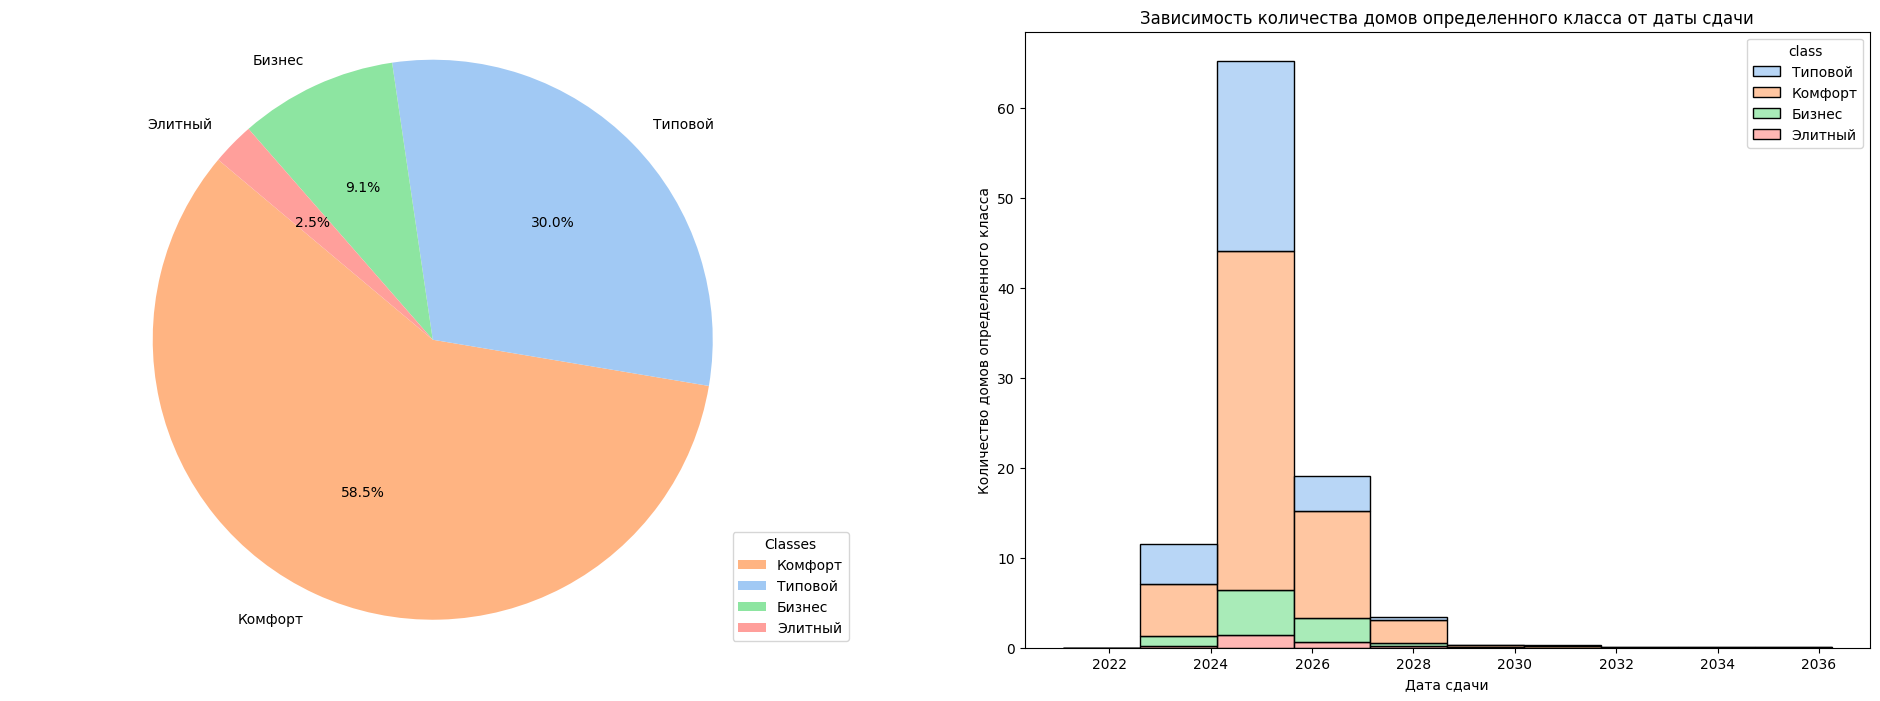

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(24, 8))

# Построение распределения классов недвижимости
axs[0].pie(df_resid['class'].value_counts(), labels=df_resid['class'].value_counts().index, colors=colors, autopct='%1.1f%%', startangle=140)
axs[0].axis('equal')
axs[0].legend(title='Classes', loc='lower right', labels=df_resid['class'].value_counts().index)

# Построение зависимости количества домов определенного класса от даты сдачи
sns.histplot(data=df_resid, x='due_date', hue='class', stat='percent', multiple='stack', palette='pastel', ax=axs[1], legend=True, bins=10)
axs[1].set_xlabel('Дата сдачи')
axs[1].set_ylabel('Количество домов определенного класса')
axs[1].set_title('Зависимость количества домов определенного класса от даты сдачи')

plt.show()

Мы видим, что наибольшую часть наших наблюдений составляют дома класса "Комфорт", то есть у нас достаточно несбалансированная выборка. С этим мы будем разбираться позднее.

## Средняя площадь квартиры

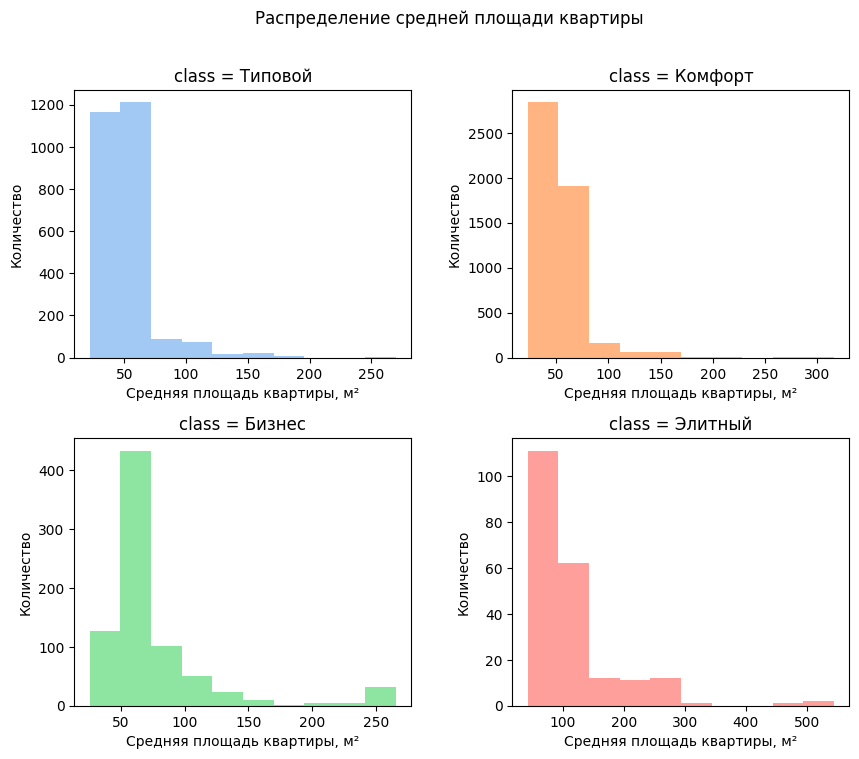

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 8))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

ax1.hist(df_resid.loc[df_resid['class']=='Типовой']['av_flat'],  linewidth=2, color=econom)
ax1.set_title('class = Типовой')
ax1.set_xlabel('Средняя площадь квартиры, м²')
ax1.set_ylabel('Количество')

ax2.hist(df_resid.loc[df_resid['class']=='Комфорт']['av_flat'],linewidth=2, color=comfort)
ax2.set_title('class = Комфорт')
ax2.set_xlabel('Средняя площадь квартиры, м²')
ax2.set_ylabel('Количество')

ax3.hist(df_resid.loc[df_resid['class']=='Бизнес']['av_flat'], linewidth=2, color=business)
ax3.set_title('class = Бизнес')
ax3.set_xlabel('Средняя площадь квартиры, м²')
ax3.set_ylabel('Количество')

ax4.hist(df_resid.loc[df_resid['class']=='Элитный']['av_flat'], linewidth=2, color=elite)
ax4.set_title('class = Элитный')
ax4.set_xlabel('Средняя площадь квартиры, м²')
ax4.set_ylabel('Количество')

pl.suptitle("Распределение средней площади квартиры")
plt.show()

Мы видим достаточно большой разброс, поэтому определим выбросы в допустимые границы интервалов.

In [98]:
q1 = 0.25
q3 = 0.75

#econom
df_tmp = df_resid.loc[df_resid['class']=='Типовой']
av_flat_max = df_tmp['av_flat'].quantile(q3) + 1.5*(df_tmp['av_flat'].quantile(q3) - df_tmp['av_flat'].quantile(q1))
df_resid.loc[(df_resid['class']=='Типовой') & (df_resid['av_flat'] > av_flat_max), 'av_flat'] = av_flat_max

#comfort
df_tmp = df_resid.loc[df_resid['class']=='Комфорт']
av_flat_max = df_tmp['av_flat'].quantile(q3) + 1.5*(df_tmp['av_flat'].quantile(q3) - df_tmp['av_flat'].quantile(q1))
df_resid.loc[(df_resid['class']=='Комфорт') & (df_resid['av_flat'] > av_flat_max), 'av_flat'] = av_flat_max

#business
df_tmp = df_resid.loc[df_resid['class']=='Бизнес']
av_flat_max = df_tmp['av_flat'].quantile(q3) + 1.5*(df_tmp['av_flat'].quantile(q3) - df_tmp['av_flat'].quantile(q1))
df_resid.loc[(df_resid['class']=='Бизнес') & (df_resid['av_flat'] > av_flat_max), 'av_flat'] = av_flat_max

#elite
df_tmp = df_resid.loc[df_resid['class']=='Элитный']
av_flat_max = df_tmp['av_flat'].quantile(q3) + 1.5*(df_tmp['av_flat'].quantile(q3) - df_tmp['av_flat'].quantile(q1))
df_resid.loc[(df_resid['class']=='Элитный') & (df_resid['av_flat'] > av_flat_max), 'av_flat'] = av_flat_max

<ipython-input-99-1458809b07a0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_resid, x='class', y='av_flat', palette='pastel')


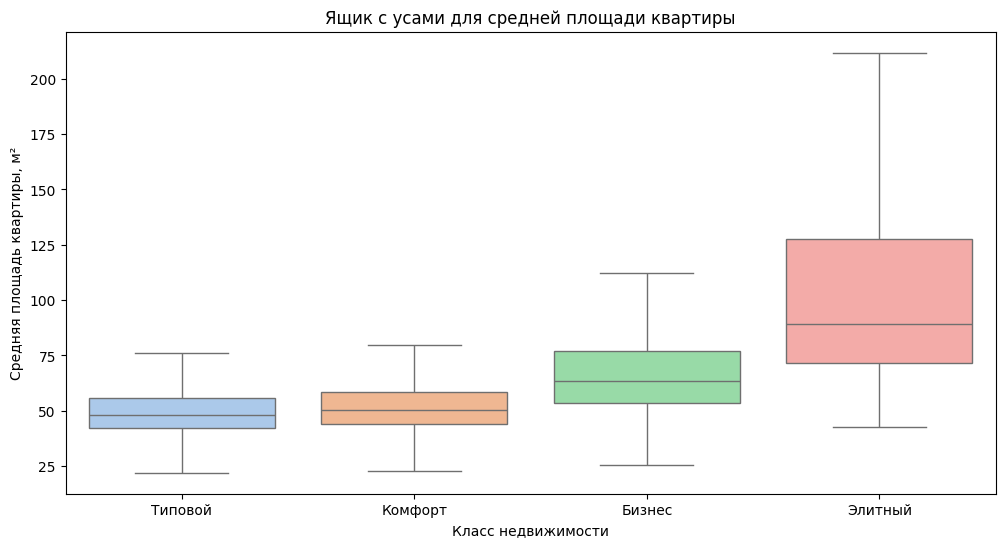

In [99]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_resid, x='class', y='av_flat', palette='pastel')
plt.xlabel('Класс недвижимости')
plt.ylabel('Средняя площадь квартиры, м²')
plt.title('Ящик с усами для средней площади квартиры');
plt.show()

Как можно увидеть, **средняя площадь квартиры увеличивается с повышением класса недвижимости**.

## Потолки

<ipython-input-101-dbbcf581cd18>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y='min_ceiling_height', data=df_resid, palette='pastel',  ax=axs[0])
<ipython-input-101-dbbcf581cd18>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y='max_ceiling_height', data=df_resid, palette='pastel', ax=axs[1])


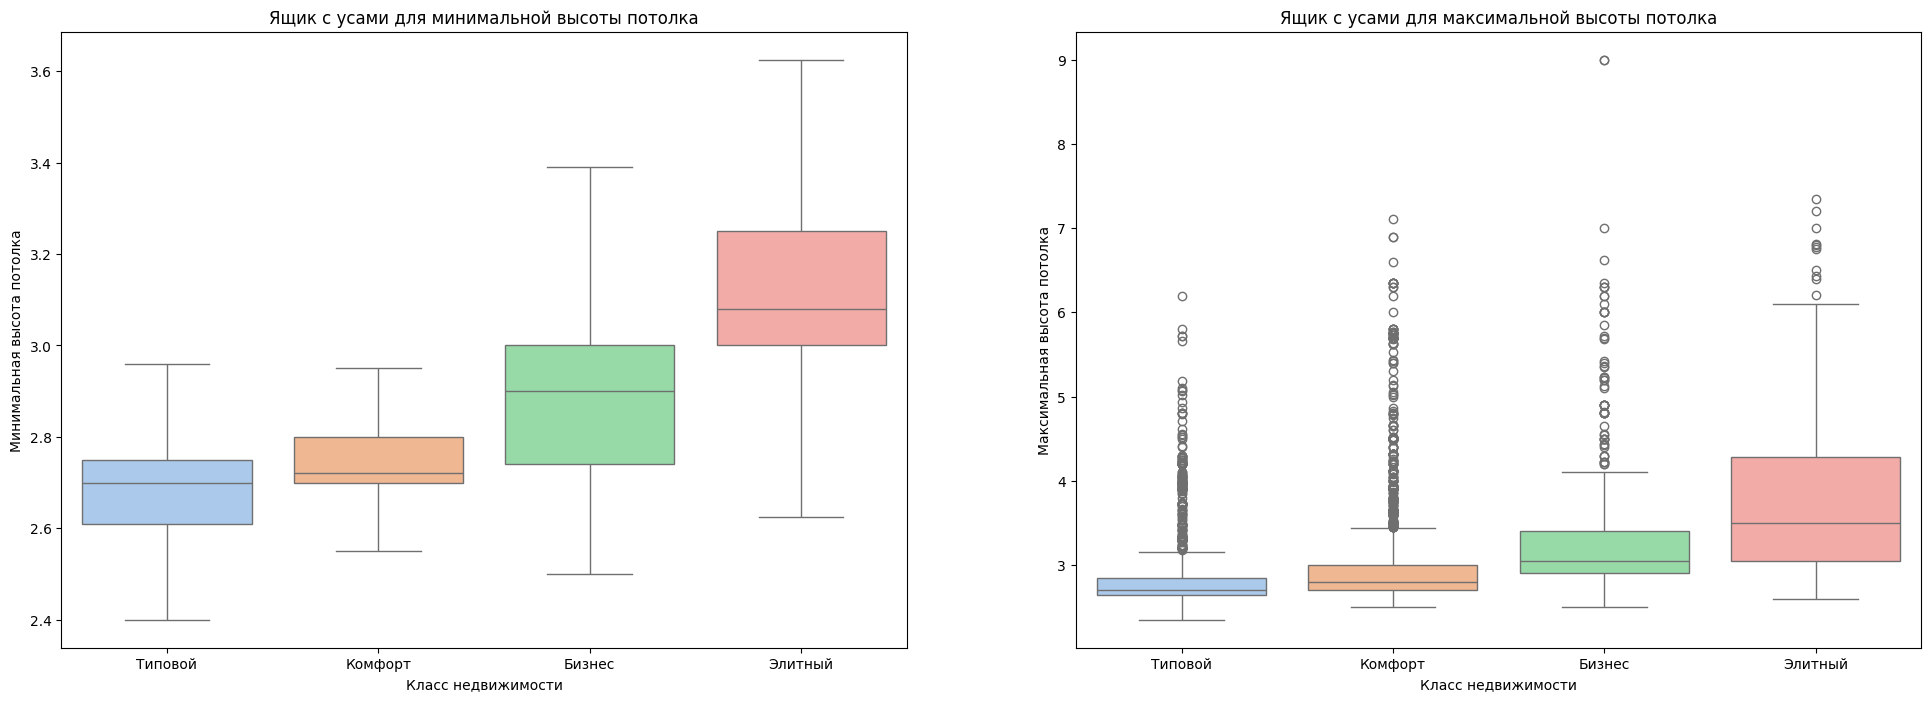

In [101]:
fig, axs = plt.subplots(1, 2, figsize=(24, 8))

# Построение зависимости минимальной высоты потолка от класса недвижимости
sns.boxplot(x='class', y='min_ceiling_height', data=df_resid, palette='pastel',  ax=axs[0])
axs[0].set_xlabel('Класс недвижимости')
axs[0].set_ylabel('Минимальная высота потолка')
axs[0].set_title('Ящик с усами для минимальной высоты потолка')


# Построение зависимости минимальной высоты потолка от класса недвижимости
sns.boxplot(x='class', y='max_ceiling_height', data=df_resid, palette='pastel', ax=axs[1])
axs[1].set_xlabel('Класс недвижимости')
axs[1].set_ylabel('Максимальная высота потолка')
axs[1].set_title('Ящик с усами для максимальной высоты потолка')
plt.show()

С повышением класса недвижимости увеличиваются минимальная и максимальная высота потолка, а соответственно этот диапазон сдвигается вверх. В дальнейшем мы будем использовать только минимальную высотку как определяющий фактор класса недвижимости: мы видим, что разброс минимальной высоты сильно меньше.
Отсюда появляется наша гипотеза о том, что **на класс недвижимости влияет высота потолков**.

In [100]:
# Поскольку мы в дальнейшем будем использовать минимальную высоту потолков, поэтому заменим выбросы на границы интервалов
q1 = 0.25
q3 = 0.75

#econom
df_tmp = df_resid.loc[df_resid['class']=='Типовой']
c_max = df_tmp['min_ceiling_height'].quantile(q3) + 1.5*(df_tmp['min_ceiling_height'].quantile(q3) - df_tmp['min_ceiling_height'].quantile(q1))
df_resid.loc[(df_resid['class']=='Типовой') & (df_resid['min_ceiling_height'] > c_max), 'min_ceiling_height'] = c_max

c_min = df_tmp['min_ceiling_height'].quantile(q1) - 1.5*(df_tmp['min_ceiling_height'].quantile(q3) - df_tmp['min_ceiling_height'].quantile(q1))
df_resid.loc[(df_resid['class']=='Типовой') & (df_resid['min_ceiling_height'] < c_min), 'min_ceiling_height'] = c_min


#comfort
df_tmp = df_resid.loc[df_resid['class']=='Комфорт']
c_max = df_tmp['min_ceiling_height'].quantile(q3) + 1.5*(df_tmp['min_ceiling_height'].quantile(q3) - df_tmp['min_ceiling_height'].quantile(q1))
df_resid.loc[(df_resid['class']=='Комфорт') & (df_resid['min_ceiling_height'] > c_max), 'min_ceiling_height'] = c_max

c_min = df_tmp['min_ceiling_height'].quantile(q1) - 1.5*(df_tmp['min_ceiling_height'].quantile(q3) - df_tmp['min_ceiling_height'].quantile(q1))
df_resid.loc[(df_resid['class']=='Комфорт') & (df_resid['min_ceiling_height'] < c_min), 'min_ceiling_height'] = c_min

#business
df_tmp = df_resid.loc[df_resid['class']=='Бизнес']
c_max = df_tmp['min_ceiling_height'].quantile(q3) + 1.5*(df_tmp['min_ceiling_height'].quantile(q3) - df_tmp['min_ceiling_height'].quantile(q1))
df_resid.loc[(df_resid['class']=='Бизнес') & (df_resid['min_ceiling_height'] > c_max), 'min_ceiling_height'] = c_max

c_min = df_tmp['min_ceiling_height'].quantile(q1) - 1.5*(df_tmp['min_ceiling_height'].quantile(q3) - df_tmp['min_ceiling_height'].quantile(q1))
df_resid.loc[(df_resid['class']=='Бизнес') & (df_resid['min_ceiling_height'] < c_min), 'min_ceiling_height'] = c_min

#elite
df_tmp = df_resid.loc[df_resid['class']=='Элитный']
c_max = df_tmp['min_ceiling_height'].quantile(q3) + 1.5*(df_tmp['min_ceiling_height'].quantile(q3) - df_tmp['min_ceiling_height'].quantile(q1))
df_resid.loc[(df_resid['class']=='Элитный') & (df_resid['min_ceiling_height'] > c_max), 'min_ceiling_height'] = c_max

c_min = df_tmp['min_ceiling_height'].quantile(q1) - 1.5*(df_tmp['min_ceiling_height'].quantile(q3) - df_tmp['min_ceiling_height'].quantile(q1))
df_resid.loc[(df_resid['class']=='Элитный') & (df_resid['min_ceiling_height'] < c_min), 'min_ceiling_height'] = c_min


## Количество этажей

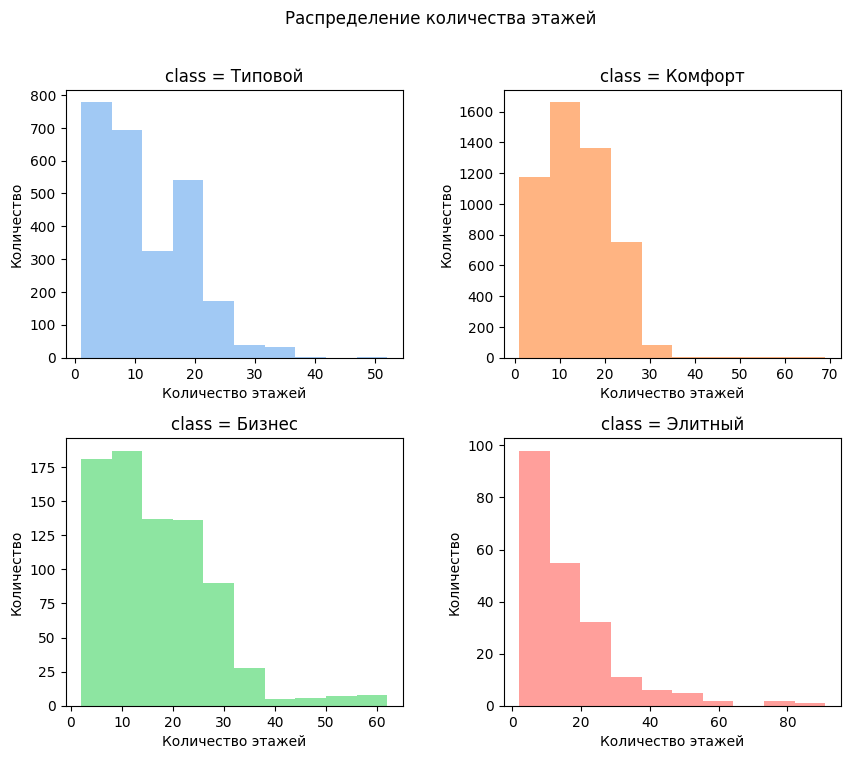

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 8))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

ax1.hist(df_resid.loc[df_resid['class']=='Типовой']['n_floors'],  linewidth=2, color=econom)
ax1.set_title('class = Типовой')
ax1.set_xlabel('Количество этажей')
ax1.set_ylabel('Количество')

ax2.hist(df_resid.loc[df_resid['class']=='Комфорт']['n_floors'],linewidth=2, color=comfort)
ax2.set_title('class = Комфорт')
ax2.set_xlabel('Количество этажей')
ax2.set_ylabel('Количество')

ax3.hist(df_resid.loc[df_resid['class']=='Бизнес']['n_floors'], linewidth=2, color=business)
ax3.set_title('class = Бизнес')
ax3.set_xlabel('Количество этажей')
ax3.set_ylabel('Количество')

ax4.hist(df_resid.loc[df_resid['class']=='Элитный']['n_floors'], linewidth=2, color=elite)
ax4.set_title('class = Элитный')
ax4.set_xlabel('Количество этажей')
ax4.set_ylabel('Количество')

pl.suptitle("Распределение количества этажей")
plt.show()

Создается ощущение, что у нас в целом этажность не сильно зависит от класса недвижимости.

## Паркинг

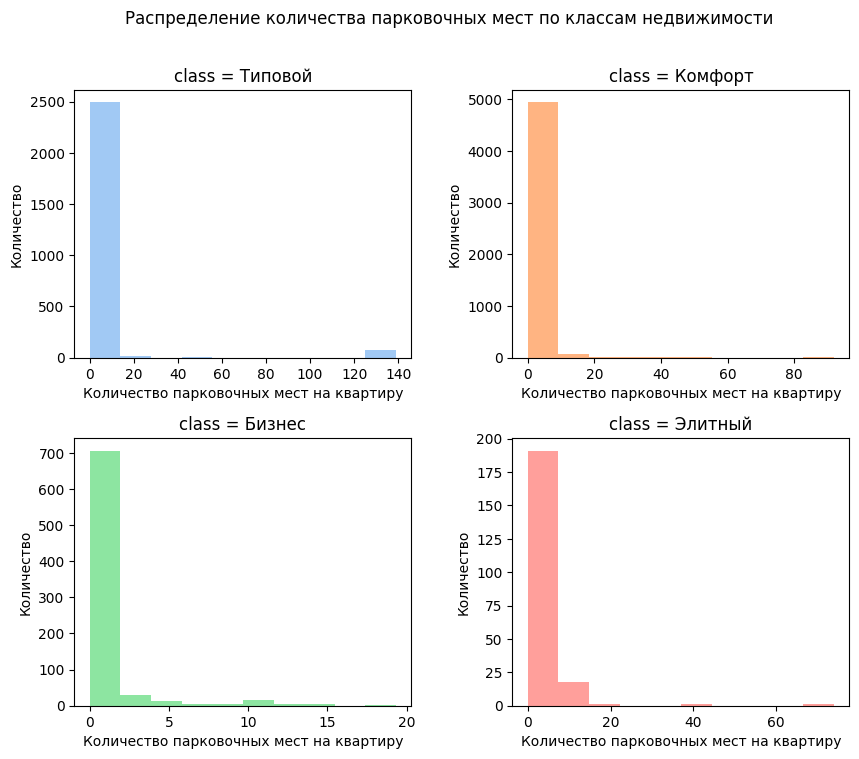

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 8))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

ax1.hist(df_resid.loc[df_resid['class']=='Типовой']['n_parking_per_flat'],  linewidth=2, color=econom)
ax1.set_title('class = Типовой')
ax1.set_xlabel('Количество парковочных мест на квартиру')
ax1.set_ylabel('Количество')

ax2.hist(df_resid.loc[df_resid['class']=='Комфорт']['n_parking_per_flat'],linewidth=2, color=comfort)
ax2.set_title('class = Комфорт')
ax2.set_xlabel('Количество парковочных мест на квартиру')
ax2.set_ylabel('Количество')

ax3.hist(df_resid.loc[df_resid['class']=='Бизнес']['n_parking_per_flat'], linewidth=2, color=business)
ax3.set_title('class = Бизнес')
ax3.set_xlabel('Количество парковочных мест на квартиру')
ax3.set_ylabel('Количество')

ax4.hist(df_resid.loc[df_resid['class']=='Элитный']['n_parking_per_flat'], linewidth=2, color=elite)
ax4.set_title('class = Элитный')
ax4.set_xlabel('Количество парковочных мест на квартиру')
ax4.set_ylabel('Количество')

pl.suptitle("Распределение количества парковочных мест по классам недвижимости")
plt.show()

Мы видим, что у нас достаточно большие выбросы оказались: скорее всего это произошло из-за наших "махинаций" с поиском дополнительных парковок. Поэтому мы с ними поработаем — заменим на верхние квантили.

In [ ]:
q1 = 0.25
q3 = 0.75

#econom
df_tmp = df_resid.loc[df_resid['class']=='Типовой']
parking_max = df_tmp['n_parking_per_flat'].quantile(q3) + 1.5*(df_tmp['n_parking_per_flat'].quantile(q3) - df_tmp['n_parking_per_flat'].quantile(q1))
df_resid.loc[(df_resid['class']=='Типовой') & (df_resid['n_parking_per_flat'] > parking_max), 'n_parking_per_flat'] = parking_max

#comfort
df_tmp = df_resid.loc[df_resid['class']=='Комфорт']
parking_max = df_tmp['n_parking_per_flat'].quantile(q3) + 1.5*(df_tmp['n_parking_per_flat'].quantile(q3) - df_tmp['n_parking_per_flat'].quantile(q1))
df_resid.loc[(df_resid['class']=='Комфорт') & (df_resid['n_parking_per_flat'] > parking_max), 'n_parking_per_flat'] = parking_max

#business
df_tmp = df_resid.loc[df_resid['class']=='Бизнес']
parking_max = df_tmp['n_parking_per_flat'].quantile(q3) + 1.5*(df_tmp['n_parking_per_flat'].quantile(q3) - df_tmp['n_parking_per_flat'].quantile(q1))
df_resid.loc[(df_resid['class']=='Бизнес') & (df_resid['n_parking_per_flat'] > parking_max), 'n_parking_per_flat'] = parking_max

#elite
df_tmp = df_resid.loc[df_resid['class']=='Элитный']
parking_max = df_tmp['n_parking_per_flat'].quantile(q3) + 1.5*(df_tmp['n_parking_per_flat'].quantile(q3) - df_tmp['n_parking_per_flat'].quantile(q1))
df_resid.loc[(df_resid['class']=='Элитный') & (df_resid['n_parking_per_flat'] > parking_max), 'n_parking_per_flat'] = parking_max


<ipython-input-43-9cbeeaae0334>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y='n_parking_per_flat', data=df_resid, palette='pastel')


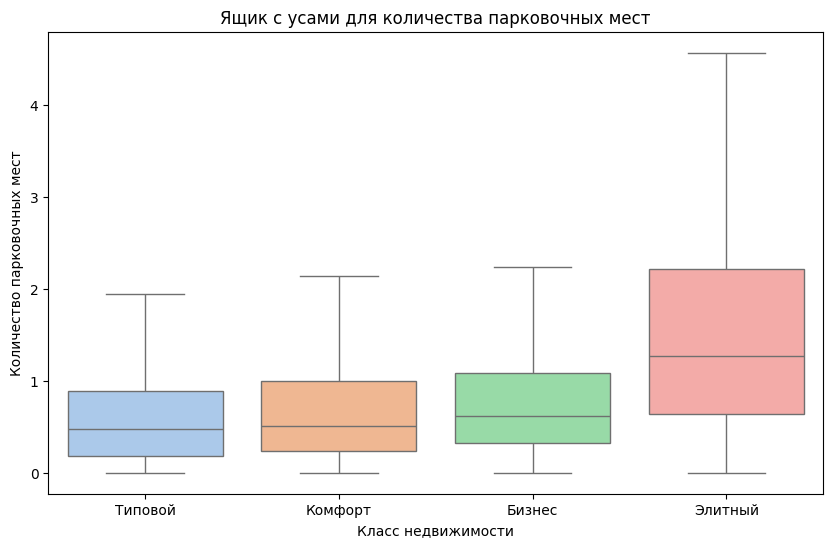

In [ ]:
#Проверим, что теперь все ок

plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='n_parking_per_flat', data=df_resid, palette='pastel')
plt.xlabel('Класс недвижимости')
plt.ylabel('Количество парковочных мест')
plt.title('Ящик с усами для количества парковочных мест')
plt.show()

Можно заметить, что их количество растет с повышением класса недвижимости. Отсюда появляется наша гипотеза о том, что **количество парковочных мест на квартиру положительно зависит от класса недвижимости**.

## Детские и спортивные площадки

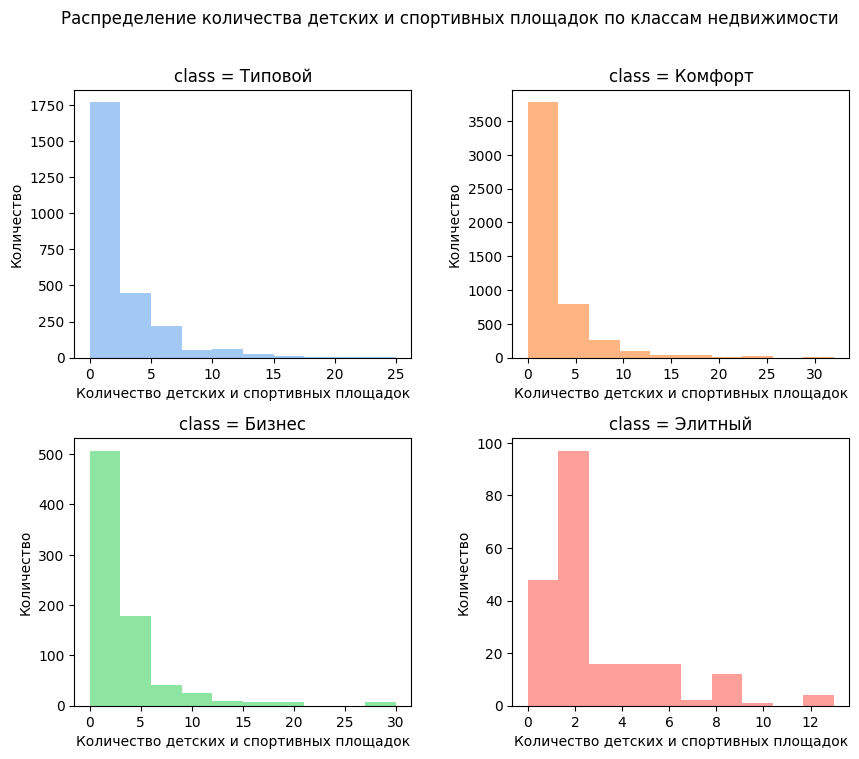

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 8))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

ax1.hist(df_resid.loc[df_resid['class']=='Типовой']['n_p_s_grounds'],  linewidth=2, color=econom)
ax1.set_title('class = Типовой')
ax1.set_xlabel('Количество детских и спортивных площадок')
ax1.set_ylabel('Количество')

ax2.hist(df_resid.loc[df_resid['class']=='Комфорт']['n_p_s_grounds'],linewidth=2, color=comfort)
ax2.set_title('class = Комфорт')
ax2.set_xlabel('Количество детских и спортивных площадок')
ax2.set_ylabel('Количество')

ax3.hist(df_resid.loc[df_resid['class']=='Бизнес']['n_p_s_grounds'], linewidth=2, color=business)
ax3.set_title('class = Бизнес')
ax3.set_xlabel('Количество детских и спортивных площадок')
ax3.set_ylabel('Количество')

ax4.hist(df_resid.loc[df_resid['class']=='Элитный']['n_p_s_grounds'], linewidth=2, color=elite)
ax4.set_title('class = Элитный')
ax4.set_xlabel('Количество детских и спортивных площадок')
ax4.set_ylabel('Количество')

pl.suptitle("Распределение количества детских и спортивных площадок по классам недвижимости")
plt.show()

<ipython-input-14-f7e8a288579e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y='n_p_s_grounds', data=df_resid, palette='pastel')


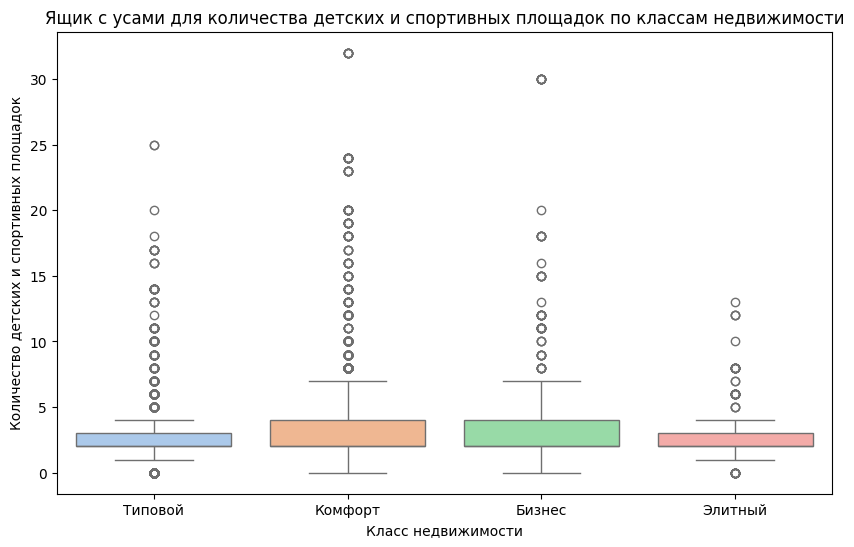

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='n_p_s_grounds', data=df_resid, palette='pastel')
plt.xlabel('Класс недвижимости')
plt.ylabel('Количество детских и спортивных площадок')
plt.title('Ящик с усами для количества детских и спортивных площадок по классам недвижимости')
plt.show()

В целом, мы видим, что количество детских площадок не сильно влияет на класс недвижимости. Конечно, в комфорте и бизнес классе их количество больше, чем в типовом; однако, для элитного класса наблюдается, наоборот, снижение.

Требования к детским и спортивным площадкам в регионах разные, например, в Москве, застройщики редко строят площадки за свой счет, поскольку московские программы по благоустройству парков в достаточной мере обеспечивают спортивными и детскими площадками. Именно из-за невозможности оценить специфику такого распределения мы не будем много внимания им уделять.

## Класс энергетической эффективности

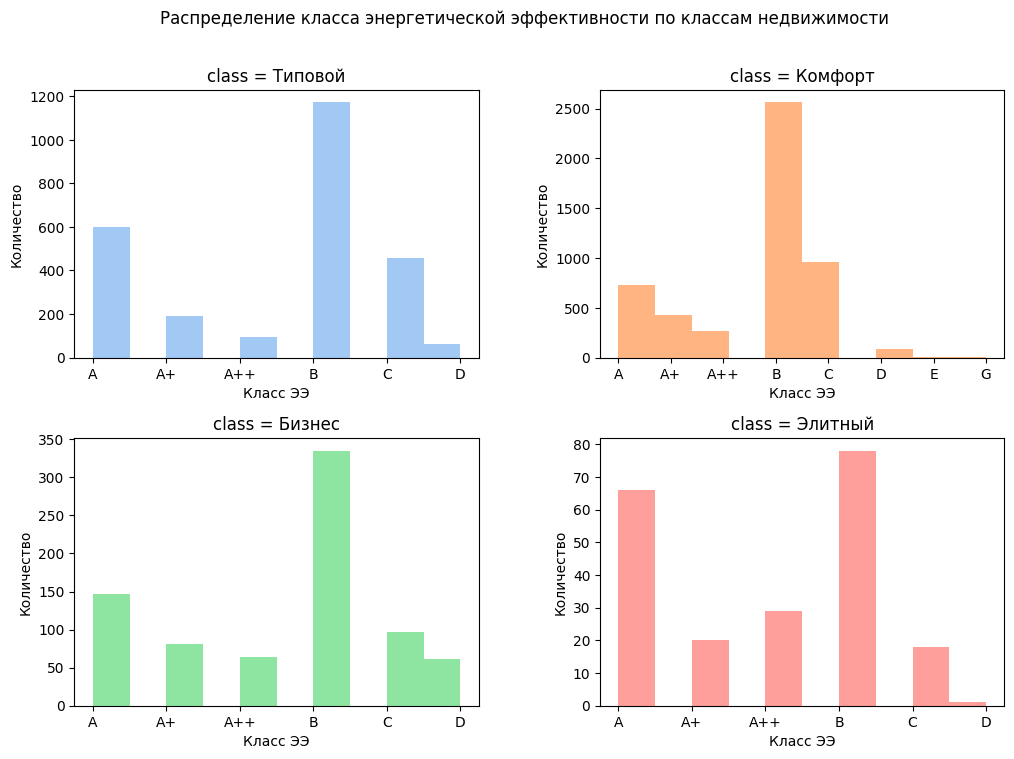

In [ ]:
# Построение распределения признака 'Класс энергетической эффективности' по классам недвижимости
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))

plt.subplots_adjust(wspace=0.3, hspace=0.3)
df = df_resid.sort_values(by=['energy_efficiency'])

ax1.hist(df.loc[df['class']=='Типовой']['energy_efficiency'],  linewidth=2, color=econom)
ax1.set_title('class = Типовой')
ax1.set_xlabel('Класс ЭЭ')
ax1.set_ylabel('Количество')

ax2.hist(df.loc[df['class']=='Комфорт']['energy_efficiency'],linewidth=2, color=comfort)
ax2.set_title('class = Комфорт')
ax2.set_xlabel('Класс ЭЭ')
ax2.set_ylabel('Количество')

ax3.hist(df.loc[df['class']=='Бизнес']['energy_efficiency'], linewidth=2, color=business)
ax3.set_title('class = Бизнес')
ax3.set_xlabel('Класс ЭЭ')
ax3.set_ylabel('Количество')

ax4.hist(df.loc[df['class']=='Элитный']['energy_efficiency'], linewidth=2, color=elite)
ax4.set_title('class = Элитный')
ax4.set_xlabel('Класс ЭЭ')
ax4.set_ylabel('Количество')

pl.suptitle("Распределение класса энергетической эффективности по классам недвижимости")
plt.show()

В среднем мы видим примерно одинаковое распределение класса энергоэффективности в четырех рассматриваемых классах недвижимости. Данное наблюдение позволяет предполагать, что **класс энергоэффективности не зависит от класса недвижимости**

## Доступность инфраструктуры

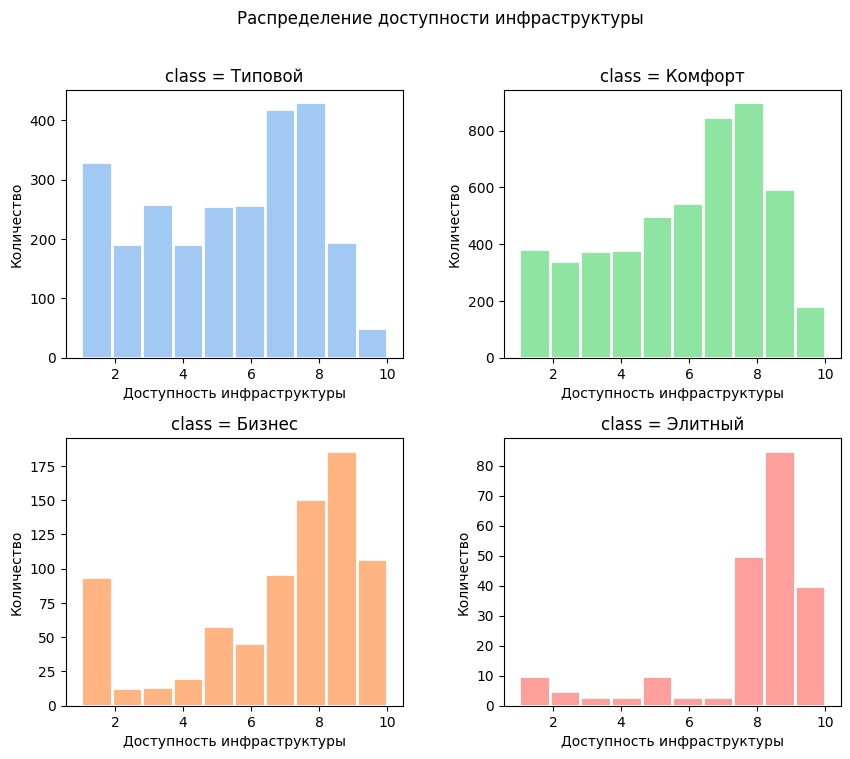

In [ ]:
# Построение распределения признака 'Доступность инфраструктуры' по классам недвижимости
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 8))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

ax1.hist(df_resid.loc[df_resid['class']=='Типовой']['infrastr_access'], linewidth=2, color=econom, edgecolor='white')
ax1.set_title('class = Типовой')
ax1.set_xlabel('Доступность инфраструктуры')
ax1.set_ylabel('Количество')

ax2.hist(df_resid.loc[df_resid['class']=='Комфорт']['infrastr_access'],linewidth=2, color=business, edgecolor='white')
ax2.set_title('class = Комфорт')
ax2.set_xlabel('Доступность инфраструктуры')
ax2.set_ylabel('Количество')

ax3.hist(df_resid.loc[df_resid['class']=='Бизнес']['infrastr_access'], linewidth=2, color=comfort, edgecolor='white')
ax3.set_title('class = Бизнес')
ax3.set_xlabel('Доступность инфраструктуры')
ax3.set_ylabel('Количество')

ax4.hist(df_resid.loc[df_resid['class']=='Элитный']['infrastr_access'], linewidth=2, color=elite, edgecolor='white')
ax4.set_title('class = Элитный')
ax4.set_xlabel('Доступность инфраструктуры')
ax4.set_ylabel('Количество')

pl.suptitle("Распределение доступности инфраструктуры")
plt.show()

Из построенных распределений видно, что для недвижимости элитного класса индекс доступности инфраструктуры приближается к 8-10, в то время как среди других классов доля объектов с более низкими значениями индекса больше, чем среди элитной недвижимости.
**Предположим, что индекс доступности инфраструктуры положительно влияет на класс недвижимости.**

## Транспортная доступность

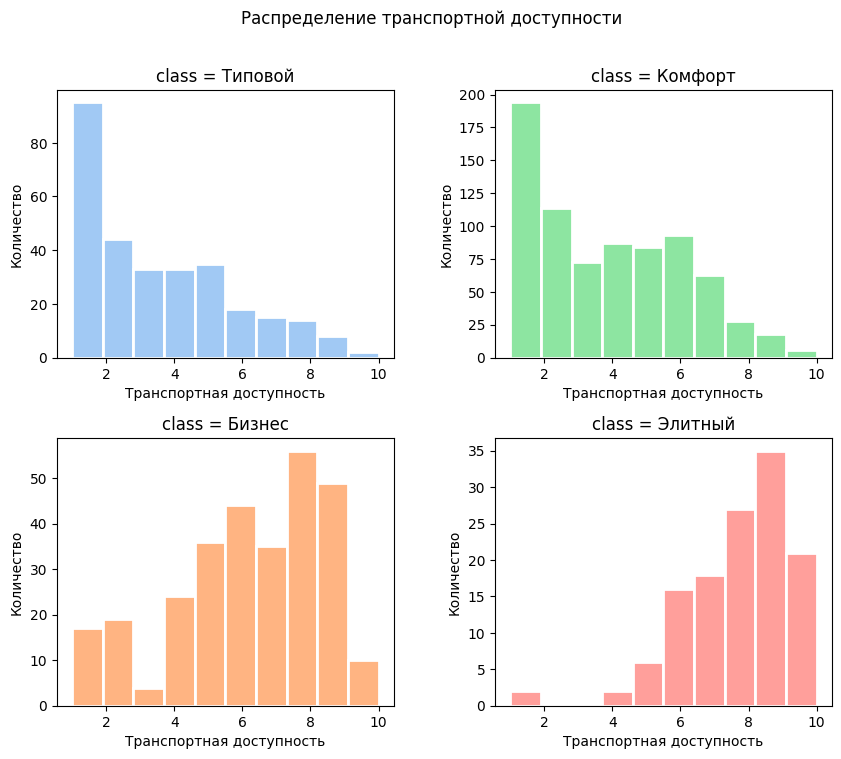

In [ ]:
# Построение распределения признака 'Транспортная доступность' по классам недвижимости
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 8))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

ax1.hist(df_resid.loc[df_resid['class']=='Типовой']['transport_access'], linewidth=2, color=econom, edgecolor='white')
ax1.set_title('class = Типовой')
ax1.set_xlabel('Транспортная доступность')
ax1.set_ylabel('Количество')

ax2.hist(df_resid.loc[df_resid['class']=='Комфорт']['transport_access'],linewidth=2, color=business, edgecolor='white')
ax2.set_title('class = Комфорт')
ax2.set_xlabel('Транспортная доступность')
ax2.set_ylabel('Количество')

ax3.hist(df_resid.loc[df_resid['class']=='Бизнес']['transport_access'], linewidth=2, color=comfort, edgecolor='white')
ax3.set_title('class = Бизнес')
ax3.set_xlabel('Транспортная доступность')
ax3.set_ylabel('Количество')

ax4.hist(df_resid.loc[df_resid['class']=='Элитный']['transport_access'], linewidth=2, color=elite, edgecolor='white')
ax4.set_title('class = Элитный')
ax4.set_xlabel('Транспортная доступность')
ax4.set_ylabel('Количество')

pl.suptitle("Распределение транспортной доступности")
plt.show()

Видно, что транспортная доступность для более высоких классов недвижимости — выше. К сожалению, данных по этим параметрам мало (мы это видели в предварительной обработке данных), поэтому мы не сможем адекватно подтвердить или опровергнуть нашу гипотезу.

## Инфраструктура для маломобильных лиц

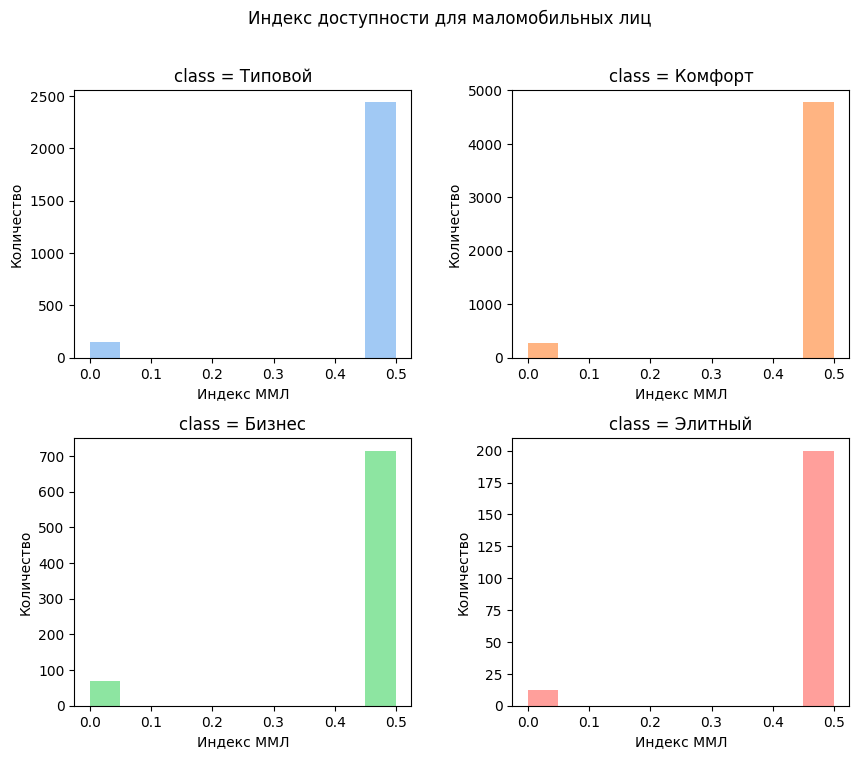

In [ ]:
#Посмотрим на распределение индекса, который мы вводили до этого — инфраструктура для маломобильных лиц

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 8))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

ax1.hist(df_resid.loc[df_resid['class']=='Типовой']['low_mobility_facilities'],  linewidth=2, color=econom)
ax1.set_title('class = Типовой')
ax1.set_xlabel('Индекс ММЛ')
ax1.set_ylabel('Количество')

ax2.hist(df_resid.loc[df_resid['class']=='Комфорт']['low_mobility_facilities'],linewidth=2, color=comfort)
ax2.set_title('class = Комфорт')
ax2.set_xlabel('Индекс ММЛ')
ax2.set_ylabel('Количество')

ax3.hist(df_resid.loc[df_resid['class']=='Бизнес']['low_mobility_facilities'], linewidth=2, color=business)
ax3.set_title('class = Бизнес')
ax3.set_xlabel('Индекс ММЛ')
ax3.set_ylabel('Количество')

ax4.hist(df_resid.loc[df_resid['class']=='Элитный']['low_mobility_facilities'], linewidth=2, color=elite)
ax4.set_title('class = Элитный')
ax4.set_xlabel('Индекс ММЛ')
ax4.set_ylabel('Количество')

pl.suptitle("Индекс доступности для маломобильных лиц")
plt.show()

В целом, мы видим, что доступая средя для маломобильных лиц практически одинакова во всех классах недвижимости. Напомним, что этот индекс принимает значения {0, 0,5, 1}, где 0 - отсутствие пандусов и понижающих платформ, 0,5 - наличие одного из двух признаков, 1 - наличие и пандусов, и понижающих платформ.

## Качество воздуха

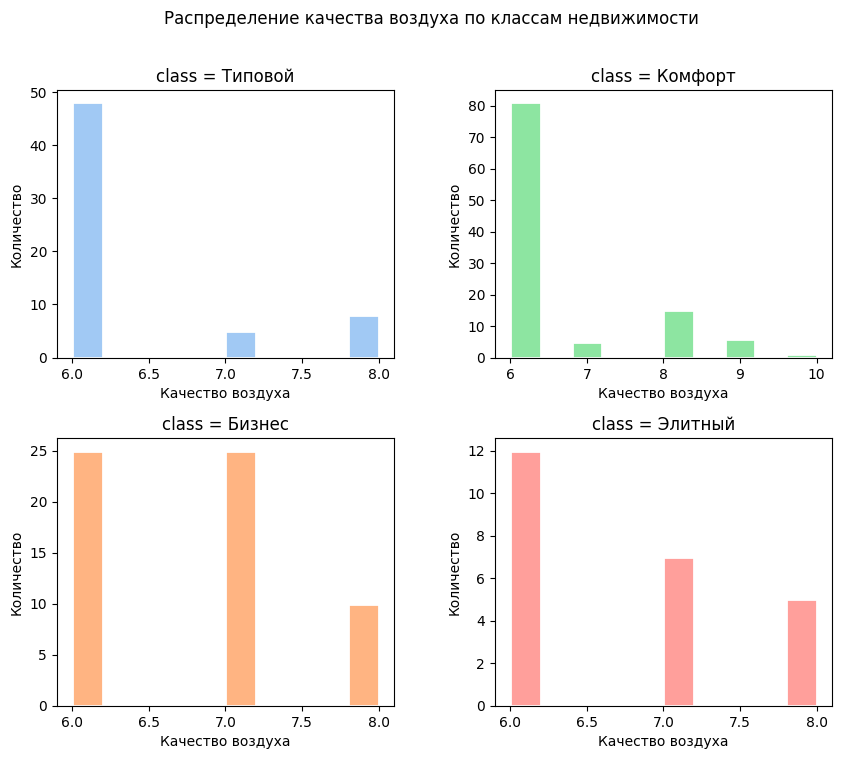

In [ ]:
# Построение распределения признака 'Качество воздуха' по классам недвижимости
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 8))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

ax1.hist(df_resid.loc[df_resid['class']=='Типовой']['air_quality'], linewidth=2, color=econom, edgecolor='white')
ax1.set_title('class = Типовой')
ax1.set_xlabel('Качество воздуха')
ax1.set_ylabel('Количество')

ax2.hist(df_resid.loc[df_resid['class']=='Комфорт']['air_quality'],linewidth=2, color=business, edgecolor='white')
ax2.set_title('class = Комфорт')
ax2.set_xlabel('Качество воздуха')
ax2.set_ylabel('Количество')

ax3.hist(df_resid.loc[df_resid['class']=='Бизнес']['air_quality'], linewidth=2, color=comfort, edgecolor='white')
ax3.set_title('class = Бизнес')
ax3.set_xlabel('Качество воздуха')
ax3.set_ylabel('Количество')

ax4.hist(df_resid.loc[df_resid['class']=='Элитный']['air_quality'], linewidth=2, color=elite, edgecolor='white')
ax4.set_title('class = Элитный')
ax4.set_xlabel('Качество воздуха')
ax4.set_ylabel('Количество')

pl.suptitle("Распределение качества воздуха по классам недвижимости")
plt.show()

## Зеленые зоны

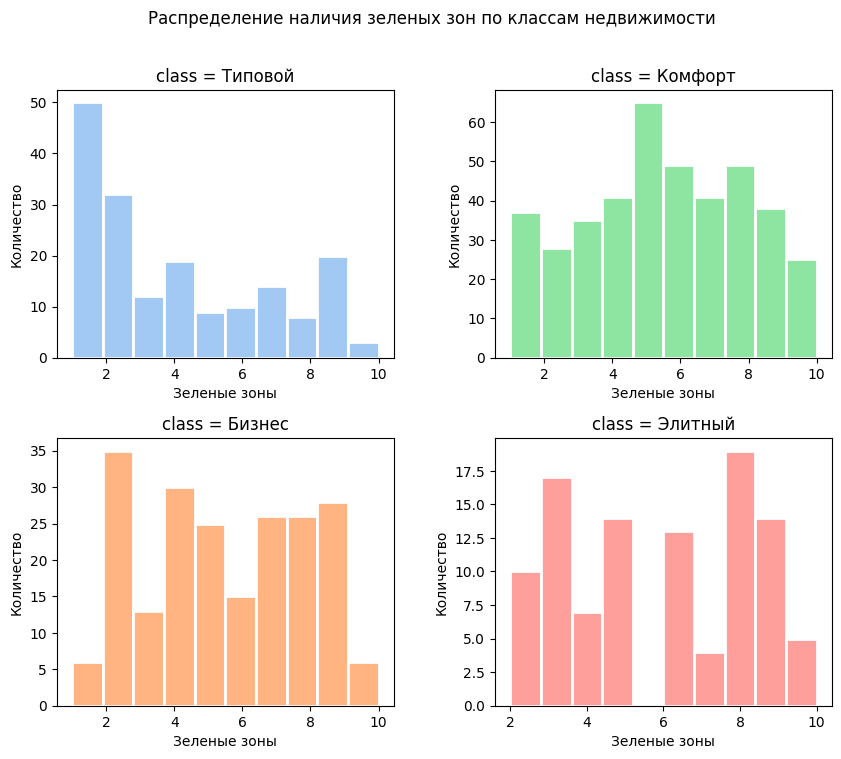

In [ ]:
# Построение распределения признака 'Зеленые зоны' по классам недвижимости
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 8))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

ax1.hist(df_resid.loc[df_resid['class']=='Типовой']['green_areas'], linewidth=2, color=econom, edgecolor='white')
ax1.set_title('class = Типовой')
ax1.set_xlabel('Зеленые зоны')
ax1.set_ylabel('Количество')

ax2.hist(df_resid.loc[df_resid['class']=='Комфорт']['green_areas'],linewidth=2, color=business, edgecolor='white')
ax2.set_title('class = Комфорт')
ax2.set_xlabel('Зеленые зоны')
ax2.set_ylabel('Количество')

ax3.hist(df_resid.loc[df_resid['class']=='Бизнес']['green_areas'], linewidth=2, color=comfort, edgecolor='white')
ax3.set_title('class = Бизнес')
ax3.set_xlabel('Зеленые зоны')
ax3.set_ylabel('Количество')

ax4.hist(df_resid.loc[df_resid['class']=='Элитный']['green_areas'], linewidth=2, color=elite, edgecolor='white')
ax4.set_title('class = Элитный')
ax4.set_xlabel('Зеленые зоны')
ax4.set_ylabel('Количество')

pl.suptitle("Распределение наличия зеленых зон по классам недвижимости")
plt.show()

Создается ощущение, что ни качество воздуха, ни наличие зелееых зон не влияет на класс недвижимости. В целом, и хорошо, в люом случае именно по этим показателям очень много пропусков.

## Оснащенность лифтами

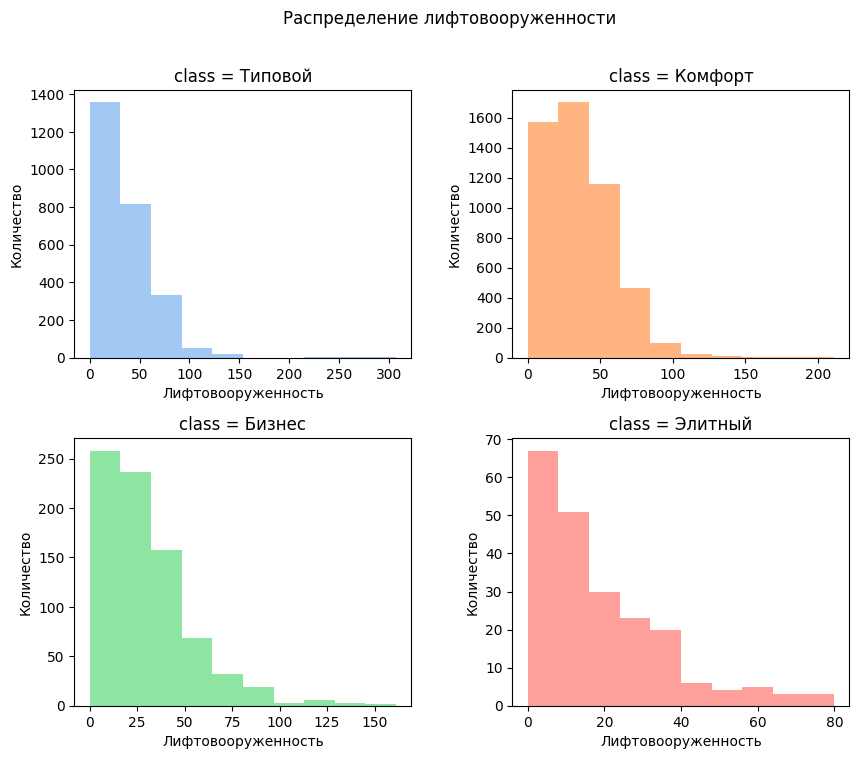

In [102]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 8))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

ax1.hist(df_resid.loc[df_resid['class']=='Типовой']['lift_ratio'],  linewidth=2, color=econom)
ax1.set_title('class = Типовой')
ax1.set_xlabel('Лифтовооруженность')
ax1.set_ylabel('Количество')

ax2.hist(df_resid.loc[df_resid['class']=='Комфорт']['lift_ratio'],linewidth=2, color=comfort)
ax2.set_title('class = Комфорт')
ax2.set_xlabel('Лифтовооруженность')
ax2.set_ylabel('Количество')

ax3.hist(df_resid.loc[df_resid['class']=='Бизнес']['lift_ratio'], linewidth=2, color=business)
ax3.set_title('class = Бизнес')
ax3.set_xlabel('Лифтовооруженность')
ax3.set_ylabel('Количество')

ax4.hist(df_resid.loc[df_resid['class']=='Элитный']['lift_ratio'], linewidth=2, color=elite)
ax4.set_title('class = Элитный')
ax4.set_xlabel('Лифтовооруженность')
ax4.set_ylabel('Количество')

pl.suptitle("Распределение лифтовооруженности")
plt.show()

In [106]:
q1 = 0.25
q3 = 0.75

#econom
df_tmp = df_resid.loc[df_resid['class']=='Типовой']
lift_max = df_tmp['lift_ratio'].quantile(q3) + 1.5*(df_tmp['lift_ratio'].quantile(q3) - df_tmp['lift_ratio'].quantile(q1))
df_resid.loc[(df_resid['class']=='Типовой') & (df_resid['lift_ratio'] > lift_max), 'lift_ratio'] = lift_max

#comfort
df_tmp = df_resid.loc[df_resid['class']=='Комфорт']
lift_max = df_tmp['lift_ratio'].quantile(q3) + 1.5*(df_tmp['lift_ratio'].quantile(q3) - df_tmp['lift_ratio'].quantile(q1))
df_resid.loc[(df_resid['class']=='Комфорт') & (df_resid['lift_ratio'] > lift_max), 'lift_ratio'] = lift_max

#business
df_tmp = df_resid.loc[df_resid['class']=='Бизнес']
lift_max = df_tmp['lift_ratio'].quantile(q3) + 1.5*(df_tmp['lift_ratio'].quantile(q3) - df_tmp['lift_ratio'].quantile(q1))
df_resid.loc[(df_resid['class']=='Бизнес') & (df_resid['lift_ratio'] > lift_max), 'lift_ratio'] = lift_max

#elite
df_tmp = df_resid.loc[df_resid['class']=='Элитный']
lift_max = df_tmp['lift_ratio'].quantile(q3) + 1.5*(df_tmp['lift_ratio'].quantile(q3) - df_tmp['lift_ratio'].quantile(q1))
df_resid.loc[(df_resid['class']=='Элитный') & (df_resid['lift_ratio'] > lift_max), 'lift_ratio'] = lift_max


<ipython-input-107-e6b13f5bfbbb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y='lift_ratio', data=df_resid, palette='pastel')


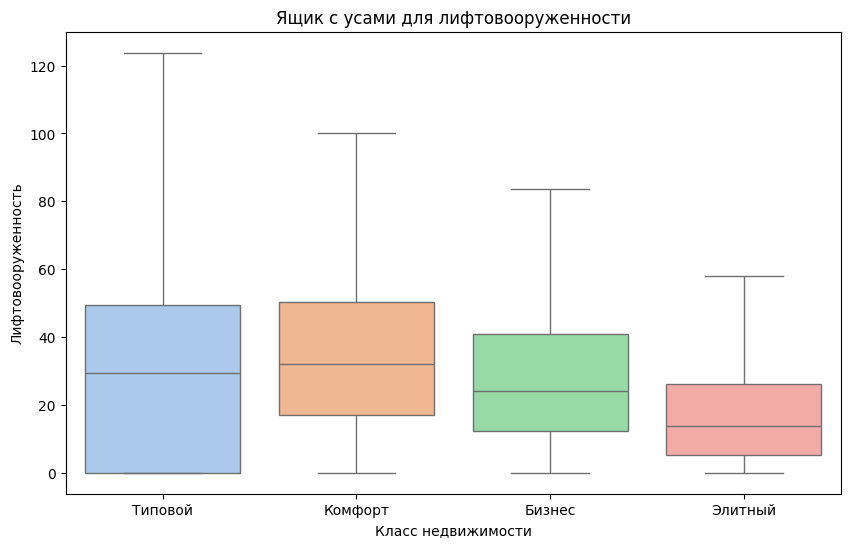

In [107]:
#Проверим, что теперь все ок

plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='lift_ratio', data=df_resid, palette='pastel')
plt.xlabel('Класс недвижимости')
plt.ylabel('Лифтовооруженность')
plt.title('Ящик с усами для лифтовооруженности')
plt.show()

Лифтовооруженность — количество квартир на один лифт. Заметим, что **оснащенность лифтами выше в недвижимости более высокого класса**.

# Итоговая табличка

In [109]:
data = {'class': df_resid['class'], 'av_flat': df_resid['av_flat'], 'min_ceiling_h': df_resid['min_ceiling_height'],
        'parking_ratio': df_resid['n_parking_per_flat'], 'infr_access': df_resid['infrastr_access'], 'lift_ratio': df_resid['lift_ratio']}
df_final = pd.DataFrame(data=data)

df_final.head()

,class,av_flat,min_ceiling_h,parking_ratio,infr_access,lift_ratio
0,Типовой,44.460000,2.70,0.000000,5,0.000000
1,Комфорт,69.358974,2.95,1.426282,8,46.800000
2,Комфорт,37.243697,2.70,1.878151,8,69.133333
3,Комфорт,40.970794,2.72,0.964953,5,72.004706
4,Комфорт,40.695195,2.72,1.040541,6,70.027941


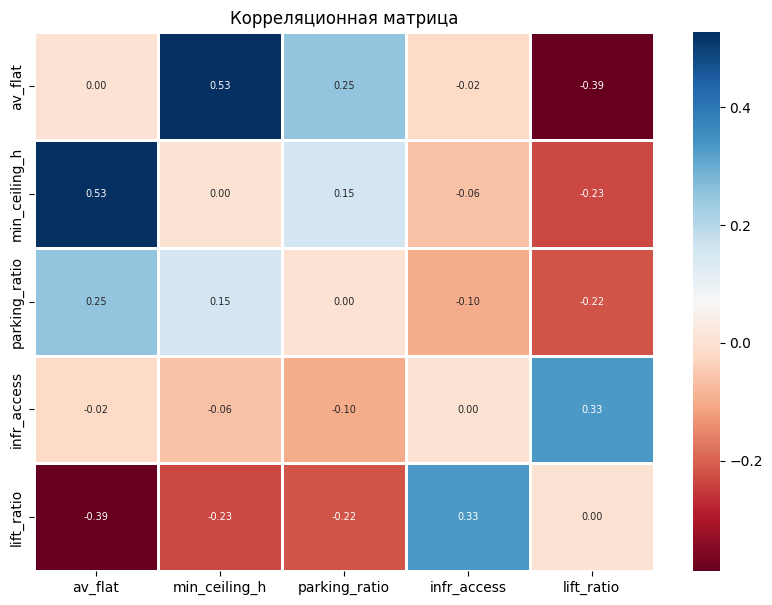

In [113]:
df = df_final.drop('class', axis=1)

# Построение корреляционной матрицы
corr_matrix = df.corr(method='pearson')
corr_matrix = corr_matrix - np.eye(corr_matrix.shape[0])

plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidths=1, cmap="RdBu", annot_kws={"size": 7})
plt.title("Корреляционная матрица")
plt.show()


In [115]:
#сохраним табличку
df_final.to_csv('final.csv', index=False)

В целом, мы видим некоторые зависимости между переменными; для дальнейшего анализа и машинного обучения мы уберем ряд признаков, чтобы их внутренние взаимосвязи не искажали итоговый результат.

# Предварительные гипотезы

## Гипотеза 1
Минимальная высота потолков в домах положительно влияет на класс недвижимости

## Гипотеза 2
Средняя площадь квартиры в домах положительно влияет на класс недвижимости

## Гипотеза 3
Количество парковочных мест на квартиру положительно зависит от класса недвижимости

## Гипотеза 4
Индекс доступности инфраструктуры положительно влияет на класс недвижимости

## Гипотеза 5
Оснащенность лифтами выше в недвижимости более высокого класса

#Машинное обучение (планы)

- Будем предсказывать переменную "class" - класс недвижимости. Это категориальная переменная

- Скорее всего разбиение выборки на треин и тест будет в соотношении 80/20

Скорее всего будем использовать какие-то из следующим моделей, так как они подходят для предсказывания категориальной переменной
- Логистическая регрессия - хорошо работает с бинарными и многоклассовыми классификациями
- SVM без ядра и с гауссовским ядром - эффективен для классификации с использованием различных ядер  
- Наивный байес (категориальный и мультиномиал) - простой и эффективный классификатор, который хорошо подходит для категориальных данных  
- Случайный лес - хорошо работает с большим количеством признаков и способна обрабатывать как категориальные, так и числовые признаки  
- KNN - может использоваться для предсказания категориальных переменных, но может быть вычислительно затратным при большом количестве признаков  
- Perceptron - эффективен при работе с большим количеством признаков и категориальными данными   
- Градиентный  бустинг - может дать хорошие результаты для классификации, включая предсказание категориальных переменных  
- Catboost - хорошо работает с категориальными данными (можно попробовать, если градиентный бустинг дал хорошие результаты)

Метрики
1. Матрица ошибок (Сonfusion matrix)
2. Меткость (Accuracy)
3. Точность (Precision)
4. Полнота (Recall)
5. F1-мера (F1-score)
Возможно, площадь под ROC-кривой (Area under ROC-curve, AUC-ROC), площадь под кривой полнота-точность (Area under precision-recall curve, AUC-PR)